In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [4]:
def machine_learning(data,algorithm):
    #reading dataset
    df = pd.read_csv(data)
    print("checking skewness of dataset...")
    print(df.skew())
    
    y =df.Survival.values
    x1=df.drop(["Survival"],axis=1)
    x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values
    kf = KFold(n_splits=10, random_state=None)
    #Split For Train and Test
    for train_index , test_index in kf.split(x):
        xtrain , xtest = x.iloc[train_index,:],x.iloc[test_index,:]
        ytrain , ytest = y[train_index] , y[test_index]
    #---------------------------------------------------------------
    if algorithm=="logistic_regression":
        # instantiate the model (using the default parameters)
        logreg = LogisticRegression()
        # fit the model with data
        logreg.fit(xtrain,ytrain)
        y_pred=logreg.predict(xtest)
        cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
        
        where_0 = np.where(ytest == 1)
        where_1 = np.where(ytest == 2)

        ytest[where_0] = 0
        ytest[where_1] = 1
        r_probs = np.array([0 for _ in range(len(ytest))])
        rf_probs = logreg.predict_proba(xtest)
        rf_probs = rf_probs[:, 1]
    
        r_auc = roc_auc_score(ytest, r_probs)
        rf_auc = roc_auc_score(ytest, rf_probs)
        r_fpr, r_tpr, _ = roc_curve(ytest, r_probs)
        rf_fpr, rf_tpr, _ = roc_curve(ytest, rf_probs)
        plt.plot(r_fpr, r_tpr, linestyle='--', label='Logistic Regression Predict(AUROC = %0.3f)' % r_auc)
        plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % rf_auc)
        # Title
        plt.title('ROC Plot')
        # Axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # Show legend
        plt.legend() # 
        # Show plot
        plt.show()
        return metrics.confusion_matrix(ytest, y_pred)
    #---------------------------------------------------------------
    elif algorithm=="random_forest":
        # instantiate the model (using the default parameters)
        logreg = RandomForestClassifier(n_estimators=20, random_state=0)
        # fit the model with data
        logreg.fit(xtrain,ytrain)
        y_pred=logreg.predict(xtest)

        where_0 = np.where(ytest == 1)
        where_1 = np.where(ytest == 2)

        ytest[where_0] = 0
        ytest[where_1] = 1
        r_probs = np.array([0 for _ in range(len(ytest))])
        rf_probs = logreg.predict_proba(xtest)
        rf_probs = rf_probs[:, 1]
    
        r_auc = roc_auc_score(ytest, r_probs)
        rf_auc = roc_auc_score(ytest, rf_probs)
        r_fpr, r_tpr, _ = roc_curve(ytest, r_probs)
        rf_fpr, rf_tpr, _ = roc_curve(ytest, rf_probs)
        plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
        plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
        # Title
        plt.title('ROC Plot')
        # Axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # Show legend
        plt.legend() # 
        # Show plot
        plt.show()
        return metrics.confusion_matrix(ytest, np.round(abs(y_pred)))
    #---------------------------------------------------------------
    elif algorithm=="support_vector_machine":
        clf = SVC(probability=True)
        clf.fit(xtrain,ytrain)
        y_pred=clf.predict(xtest)

        where_0 = np.where(ytest == 1)
        where_1 = np.where(ytest == 2)

        ytest[where_0] = 0
        ytest[where_1] = 1
        r_probs = np.array([0 for _ in range(len(ytest))])
        rf_probs = clf.predict_proba(xtest)
        rf_probs = rf_probs[:, 1]
        r_auc = roc_auc_score(ytest, r_probs)
        rf_auc = roc_auc_score(ytest, rf_probs)
        r_fpr, r_tpr, _ = roc_curve(ytest, r_probs)
        rf_fpr, rf_tpr, _ = roc_curve(ytest, rf_probs)
        plt.plot(r_fpr, r_tpr, linestyle='--', label='SVM prediction (AUROC = %0.3f)' % r_auc)
        plt.plot(rf_fpr, rf_tpr, marker='.', label='SVM (AUROC = %0.3f)' % rf_auc)
        # Title
        plt.title('ROC Plot')
        # Axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # Show legend
        plt.legend() # 
        # Show plot
        plt.show()
        return metrics.confusion_matrix(ytest, y_pred)
    #---------------------------------------------------------------
    elif algorithm=="neural_network":
        model_1 = tf.keras.Sequential([
                   tf.keras.layers.Dense(3, activation='relu'),
                   tf.keras.layers.Dense(3, activation='relu'), 
                   tf.keras.layers.Dense(4, activation='relu'), 
                   tf.keras.layers.Dense(2, activation='softmax')
        ])

        model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         metrics=['accuracy'])

        history = model_1.fit(xtrain, 
                              tf.one_hot(ytrain, depth=2), 
                              epochs=250,
                              verbose = 1,
                              validation_data=(xtest, tf.one_hot(ytest, depth=2)))

        _, acc = model_1.evaluate(xtest, tf.one_hot(ytest, depth=2))
        print(acc)

        where_0 = np.where(ytest == 1)
        where_1 = np.where(ytest == 2)

        ytest[where_0] = 0
        ytest[where_1] = 1
        r_probs = np.array([0 for _ in range(len(ytest))])
        rf_probs = model_1.predict(xtest)[:,-1]

        
        r_auc = roc_auc_score(ytest, r_probs)
        rf_auc = roc_auc_score(ytest, rf_probs)
        r_fpr, r_tpr, _ = roc_curve(ytest, r_probs)
        rf_fpr, rf_tpr, _ = roc_curve(ytest, rf_probs)
        plt.plot(r_fpr, r_tpr, linestyle='--', label='NN prediction (AUROC = %0.3f)' % r_auc)
        plt.plot(rf_fpr, rf_tpr, marker='.', label='NN (AUROC = %0.3f)' % rf_auc)
        # Title
        plt.title('ROC Plot')
        # Axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # Show legend
        plt.legend() # 
        # Show plot
        plt.show()
        return model_1.predict(xtest)

checking skewness of dataset...
Age                0.158986
Year               0.082021
Auxillary nodes    2.977682
Survival           1.066875
dtype: float64


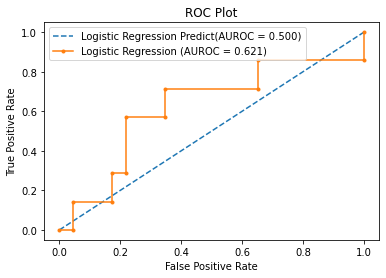

[[ 0 23]
 [ 0  7]]
checking skewness of dataset...
Age                0.158986
Year               0.082021
Auxillary nodes    2.977682
Survival           1.066875
dtype: float64


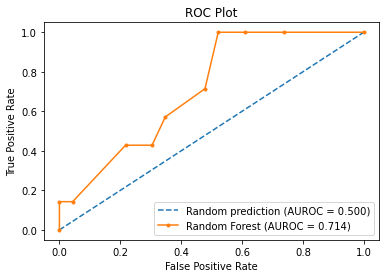

[[ 0 15  8]
 [ 0  3  4]
 [ 0  0  0]]
checking skewness of dataset...
Age                0.158986
Year               0.082021
Auxillary nodes    2.977682
Survival           1.066875
dtype: float64


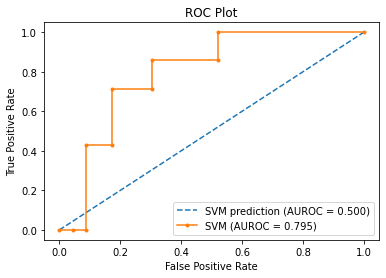

[[ 0 23]
 [ 0  7]]
checking skewness of dataset...
Age                0.158986
Year               0.082021
Auxillary nodes    2.977682
Survival           1.066875
dtype: float64
Epoch 1/250
9/9 [==============================] - 1s 45ms/step - loss: 0.6907 - accuracy: 0.6836 - val_loss: 0.6892 - val_accuracy: 0.7667
Epoch 2/250
9/9 [==============================] - 0s 6ms/step - loss: 0.6867 - accuracy: 0.7309 - val_loss: 0.6852 - val_accuracy: 0.7667
Epoch 3/250
9/9 [==============================] - 0s 5ms/step - loss: 0.6825 - accuracy: 0.7309 - val_loss: 0.6810 - val_accuracy: 0.7667
Epoch 4/250
9/9 [==============================] - 0s 6ms/step - loss: 0.6783 - accuracy: 0.7309 - val_loss: 0.6768 - val_accuracy: 0.7667
Epoch 5/250
9/9 [==============================] - 0s 8ms/step - loss: 0.6739 - accuracy: 0.7309 - val_loss: 0.6724 - val_accuracy: 0.7667
Epoch 6/250
9/9 [==============================] - 0s 7ms/step - loss: 0.6694 - accuracy: 0.7309 - val_loss: 0.6679 - val_accu

9/9 [==============================] - 0s 8ms/step - loss: 0.2975 - accuracy: 0.7309 - val_loss: 0.2733 - val_accuracy: 0.7667
Epoch 117/250
9/9 [==============================] - 0s 7ms/step - loss: 0.2975 - accuracy: 0.7309 - val_loss: 0.2732 - val_accuracy: 0.7667
Epoch 118/250
9/9 [==============================] - 0s 7ms/step - loss: 0.2973 - accuracy: 0.7309 - val_loss: 0.2733 - val_accuracy: 0.7667
Epoch 119/250
9/9 [==============================] - 0s 8ms/step - loss: 0.2973 - accuracy: 0.7309 - val_loss: 0.2734 - val_accuracy: 0.7667
Epoch 120/250
9/9 [==============================] - 0s 7ms/step - loss: 0.2972 - accuracy: 0.7309 - val_loss: 0.2734 - val_accuracy: 0.7667
Epoch 121/250
9/9 [==============================] - 0s 7ms/step - loss: 0.2971 - accuracy: 0.7309 - val_loss: 0.2734 - val_accuracy: 0.7667
Epoch 122/250
9/9 [==============================] - 0s 9ms/step - loss: 0.2972 - accuracy: 0.7309 - val_loss: 0.2732 - val_accuracy: 0.7667
Epoch 123/250
9/9 [========

9/9 [==============================] - 0s 8ms/step - loss: 0.2933 - accuracy: 0.7309 - val_loss: 0.2709 - val_accuracy: 0.7667
Epoch 233/250
9/9 [==============================] - 0s 9ms/step - loss: 0.2934 - accuracy: 0.7309 - val_loss: 0.2712 - val_accuracy: 0.7667
Epoch 234/250
9/9 [==============================] - 0s 8ms/step - loss: 0.2933 - accuracy: 0.7309 - val_loss: 0.2711 - val_accuracy: 0.7667
Epoch 235/250
9/9 [==============================] - 0s 7ms/step - loss: 0.2932 - accuracy: 0.7309 - val_loss: 0.2711 - val_accuracy: 0.7667
Epoch 236/250
9/9 [==============================] - 0s 6ms/step - loss: 0.2932 - accuracy: 0.7309 - val_loss: 0.2712 - val_accuracy: 0.7667
Epoch 237/250
9/9 [==============================] - 0s 7ms/step - loss: 0.2932 - accuracy: 0.7309 - val_loss: 0.2712 - val_accuracy: 0.7667
Epoch 238/250
9/9 [==============================] - 0s 6ms/step - loss: 0.2932 - accuracy: 0.7309 - val_loss: 0.2710 - val_accuracy: 0.7667
Epoch 239/250
9/9 [========

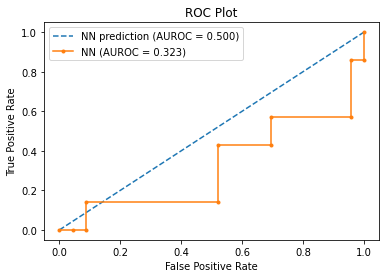

[[9.67889646e-05 9.99903202e-01]
 [2.94908736e-04 9.99705017e-01]
 [1.20949822e-04 9.99879003e-01]
 [7.69868493e-05 9.99922991e-01]
 [6.16075195e-05 9.99938369e-01]
 [6.01565444e-05 9.99939799e-01]
 [3.64074978e-04 9.99635935e-01]
 [1.19494835e-04 9.99880433e-01]
 [9.56246877e-05 9.99904394e-01]
 [5.65007736e-04 9.99435008e-01]
 [5.00985829e-04 9.99498963e-01]
 [6.23819142e-05 9.99937654e-01]
 [7.60606927e-05 9.99923944e-01]
 [6.08663613e-05 9.99939084e-01]
 [3.55502852e-04 9.99644518e-01]
 [1.85469107e-04 9.99814570e-01]
 [5.69668809e-05 9.99943018e-01]
 [1.83237949e-04 9.99816835e-01]
 [5.58213622e-04 9.99441803e-01]
 [1.46636405e-04 9.99853373e-01]
 [6.86617714e-05 9.99931335e-01]
 [2.27592362e-04 9.99772370e-01]
 [5.97713151e-05 9.99940276e-01]
 [1.05930514e-04 9.99894023e-01]
 [1.81033800e-04 9.99818981e-01]
 [2.18192741e-04 9.99781787e-01]
 [7.33485867e-05 9.99926686e-01]
 [1.04024686e-04 9.99895930e-01]
 [1.09808068e-04 9.99890208e-01]
 [4.91800834e-04 9.99508142e-01]]


In [5]:
print(machine_learning("cancer.csv","logistic_regression"))
print(machine_learning("cancer.csv","random_forest"))
print(machine_learning("cancer.csv","support_vector_machine"))
print(machine_learning("cancer.csv","neural_network"))